In [1]:
# Getting parent directory of current direc and adding into the system path
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, parent_dir)


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/home/am/Documents/Software Development/10_Academy Training/week2/Data/Copy of Week2_challenge_data_source(CSV).csv")

In [4]:
# Import user enagement module and load data from the postgresql database
from scripts.user_engagement_analysis import UserEngagementAnalysis
user_engagement = UserEngagementAnalysis()


In [5]:
aggregated_data, top10_custs = user_engagement.aggregate_metrics(df)

In [6]:
print(top10_custs["session_frequency"])
print("\n\n============================================================================")
print(top10_custs['session_duration'])
print("\n\n============================================================================")
print(top10_custs["session_traffic"])

       MSISDN/Number  session_frequency  session_duration  session_traffic
13526   3.362632e+10              324.0         8791927.0     7.971167e+09
6437    3.361489e+10              289.0         9966898.0     8.846226e+09
13180   3.362578e+10              289.0        18553754.0     8.499621e+09
37052   3.365973e+10              256.0         4035428.0     7.705863e+09
76363   3.367588e+10              225.0         4865947.0     7.891111e+09
92923   3.376054e+10              225.0         9279434.0     8.514774e+09
65118   3.366716e+10              169.0         8744914.0     5.618394e+09
666     3.360313e+10              144.0         6287761.0     4.976195e+09
1279    3.360452e+10              144.0         5207990.0     5.487855e+09
13994   3.362708e+10              144.0         4703516.0     5.754731e+09


       MSISDN/Number  session_frequency  session_duration  session_traffic
13180   3.362578e+10              289.0        18553754.0     8.499621e+09
6437    3.361489e+10   

In [7]:
agg_data, kmeans = user_engagement.normalize_and_cluster(aggregated_data, k=3)

In [8]:
kmeans

KMeans(n_clusters=3, n_init=10, random_state=4)

In [9]:
aggregated_data.columns

Index(['MSISDN/Number', 'session_frequency', 'session_duration',
       'session_traffic', 'cluster'],
      dtype='object')

In [10]:
agg_data.columns

Index(['MSISDN/Number', 'session_frequency', 'session_duration',
       'session_traffic', 'cluster'],
      dtype='object')

In [11]:
stats = user_engagement.compute_cluster_statistics(aggregated_data)

In [12]:
stats

session_frequency                             session_duration  \
                      min    max       mean       sum              min   
cluster                                                                  
0                     0.0   25.0   2.333489  110164.0           7146.0   
1                     0.0   16.0   1.179788   60240.0           7142.0   
2                     2.0  324.0  12.359655  106120.0          23292.0   

                                                 session_traffic  \
                max           mean           sum             min   
cluster                                                            
0         3174824.0  140867.038721  6.650333e+09    5.849202e+08   
1         1576929.0  108487.442812  5.539369e+09    3.324901e+07   
2        18553754.0  399386.900536  3.429136e+09    1.244485e+09   

                                                   
                  max          mean           sum  
cluster                                            
0        1.427100e+09  8.483228e+08  4.004932e+13  
1        5.986492e+08  3.420319e+08  1.746415e+13  
2        8.846226e+09  1.900766e+09  1.631998e+13

In [13]:
app_traffic, top_users_per_app = user_engagement.aggregate_traffic_per_app(df)

In [14]:
app_traffic.columns

Index(['MSISDN/Number', 'session_traffic', 'application'], dtype='object')

In [15]:
app_traffic[app_traffic['application']=="Social Media"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 106856 entries, 0 to 106855
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MSISDN/Number    106856 non-null  float64
 1   session_traffic  106856 non-null  float64
 2   application      106856 non-null  object 
dtypes: float64(2), object(1)
memory usage: 3.3+ MB


In [16]:
app_traffic['application'].unique()

array(['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming',
       'Other'], dtype=object)

In [17]:
top_users_per_app.columns

Index(['MSISDN/Number', 'session_traffic', 'application'], dtype='object')

In [18]:
top_users_per_app[top_users_per_app['application']=='Gaming']

,MSISDN/Number,session_traffic,application
540717,3.361489e+10,7.749432e+09,Gaming
627203,3.376054e+10,7.461045e+09,Gaming
547460,3.362578e+10,7.326673e+09,Gaming
610643,3.367588e+10,6.970568e+09,Gaming
547806,3.362632e+10,6.887572e+09,Gaming
571332,3.365973e+10,6.725559e+09,Gaming
597308,3.366646e+10,6.646303e+09,Gaming
626857,3.376041e+10,6.268620e+09,Gaming
591521,3.366471e+10,6.103856e+09,Gaming
620735,3.369879e+10,5.753743e+09,Gaming


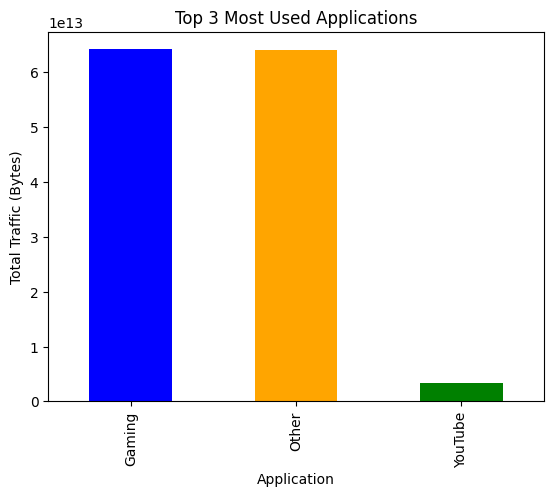

In [19]:
user_engagement.plot_top_apps(app_traffic)

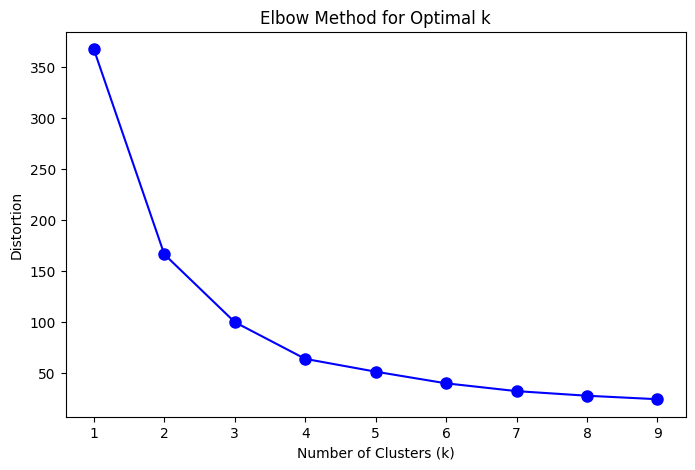

In [20]:
distortions = user_engagement.determine_optimal_k(agg_data)

In [21]:
distortions

[367.4257093617704,
 166.38390720403953,
 99.9185824195838,
 63.87875456546968,
 51.31098174645657,
 39.884161911337564,
 32.23813361676857,
 27.727169293074326,
 24.30351430061823]